# Thera Bank Personal Loan Campaign

Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Domain:
Banking

Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

Attribute Information:
- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer
- ZIP Code: Home Address ZIP
- Family: Family size of the customer
- CC Avg: Avg spending on credit cards per month
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any.
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Does the customer use a credit card issued by the bank?


Learning Outcomes:
- Exploratory Data Analysis
- Preparing the data to train a model
- Training and making predictions using a classification model
- Model evaluation

Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

Steps and tasks:
1.	Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)
2.	EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
    •	Number of unique in each column?
    •	Number of people with zero mortgage?
    •	Number of people with zero credit card spending per month?
    •	Value counts of all categorical columns.
    •	Univariate and Bivariate
    •	Get data model ready
3.	Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
4.	Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)
5.	Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)
6.	Give conclusion related to the Business understanding of your model? (5 marks)


### 1. Import the necessary package

In [1]:
#Load the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_theme(style="darkgrid")
pd.options.mode.chained_assignment = None  # default='warn'
import pandas_profiling

### 2. Read the 3 datasets into dataframes

In [2]:
#Load the various datasets
loan = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

### 3. check datatype, statistical summary, shape, null values or incorrect imputation.

In [3]:
print('*****************************Dataset Info***************************************')
print(loan.info())
print('****************************Dataset Shape***************************************')
print(loan.shape)
print('********************************Describe****************************************')
print(loan.describe().transpose())
print('***************************Number of nulls**************************************')
print(loan.isnull().sum())
print('*******************************************************************************')
print(loan.columns)
print('*******************************************************************************')

*****************************Dataset Info***************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13

**Observations:**



### 4. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
- Number of unique in each column?
- Number of people with zero mortgage?
- Number of people with zero credit card spending per month?
- Value counts of all categorical columns.
- Univariate and Bivariate
- Get data model ready

In [4]:
print("Total number of unique in each column:")
loan.nunique()

Total number of unique in each column:


ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [5]:
#output for number of people with zero mortgage
zero_mort = loan[loan["Mortgage"] < 1]
zero_mort = zero_mort.sort_values('Mortgage', ascending=True)
print("Total number of people with zero mortgage:", zero_mort.shape[0])

Total number of people with zero mortgage: 3462


In [6]:
#output for number of people with zero credit card spending per month
credit_card = loan[loan["CreditCard"] < 1]
credit_card = credit_card.sort_values('CreditCard', ascending=True)
print("Total number of people with zero credit card spending per month:", credit_card.shape[0])

Total number of people with zero credit card spending per month: 3530


In [7]:
#Value counts of all categorical columns
loan[["Income", "Family", "Education", "Mortgage", "Personal Loan", "Securities Account", "CD Account", "Online",
      "CreditCard"]].value_counts()

Income  Family  Education  Mortgage  Personal Loan  Securities Account  CD Account  Online  CreditCard
42      1       3          0         0              0                   0           1       0             7
28      1       3          0         0              0                   0           1       0             6
29      1       3          0         0              0                   0           1       0             6
38      4       2          0         0              0                   0           1       0             5
81      2       1          0         0              0                   0           1       0             5
                                                                                                         ..
59      1       2          0         0              1                   0           0       0             1
                3          0         0              0                   0           0       1             1
                                 

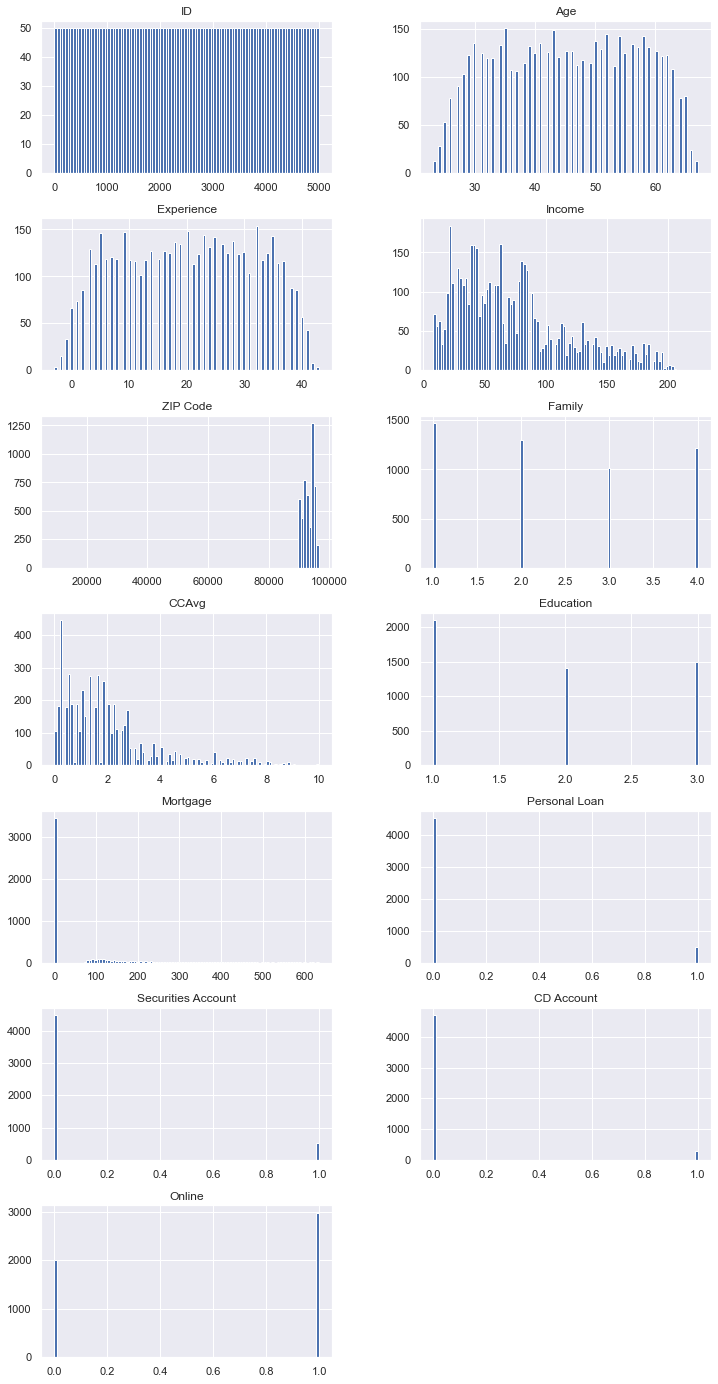

In [8]:
#Univariate
columns = list(loan)[0:-1]
loan[columns].hist(stacked=False, bins=100, figsize=(12,50), layout=(14,2)); 

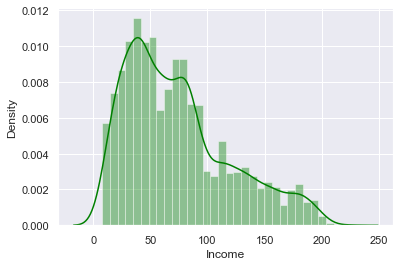

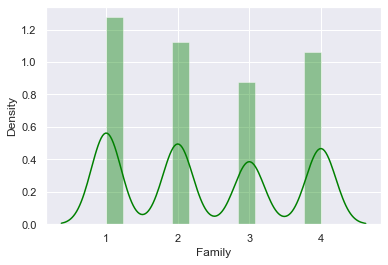

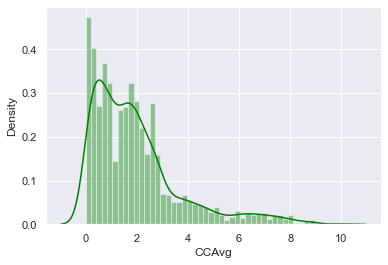

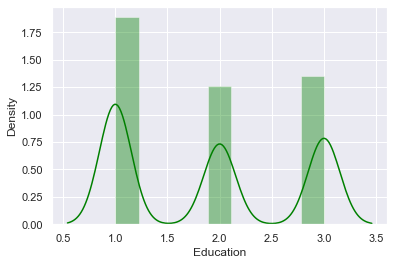

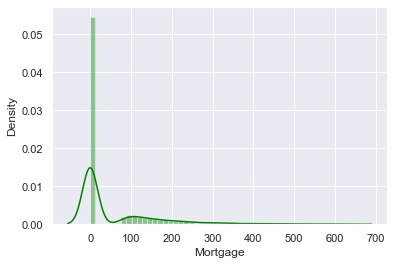

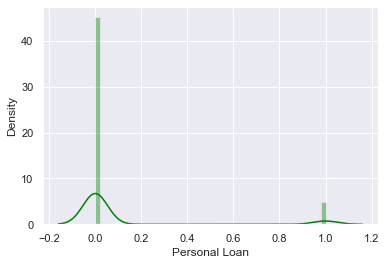

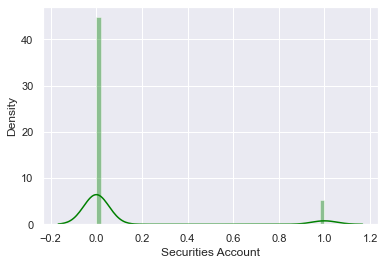

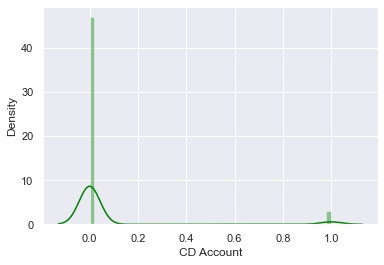

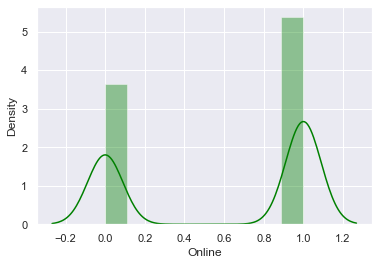

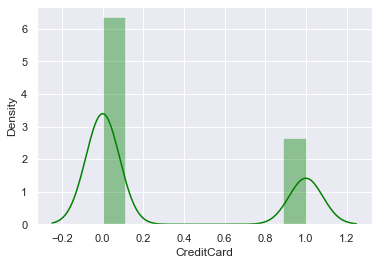

In [9]:
# distplot for continous columns
for i in ['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account','CD Account',
'Online', 'CreditCard']:
    sns.distplot(loan[i], color = 'green')
    plt.show()

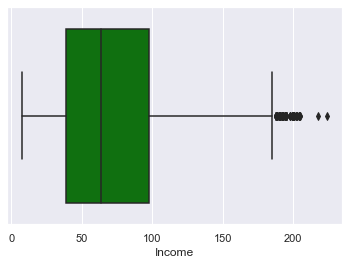

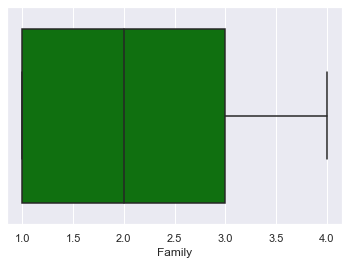

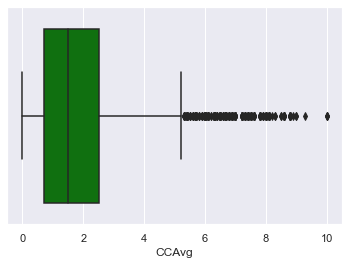

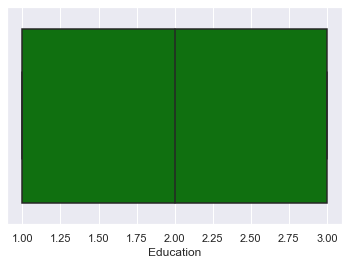

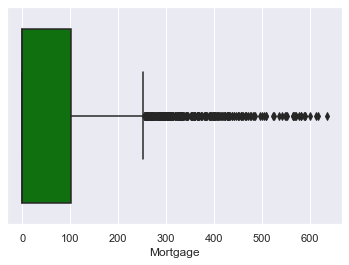

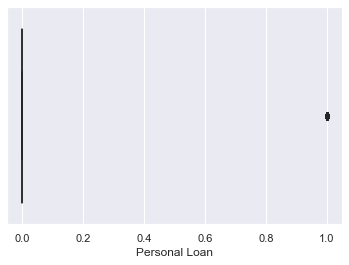

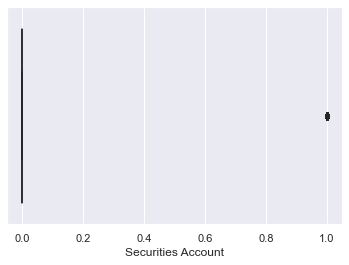

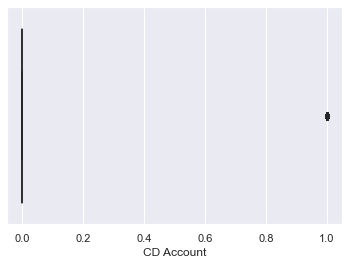

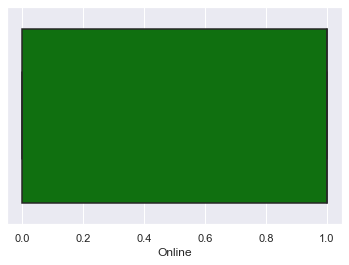

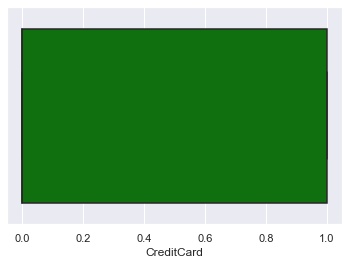

In [10]:
for i in ['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account','CD Account',
'Online', 'CreditCard']:
    sns.boxplot(loan[i], color = 'green')
    plt.show()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0


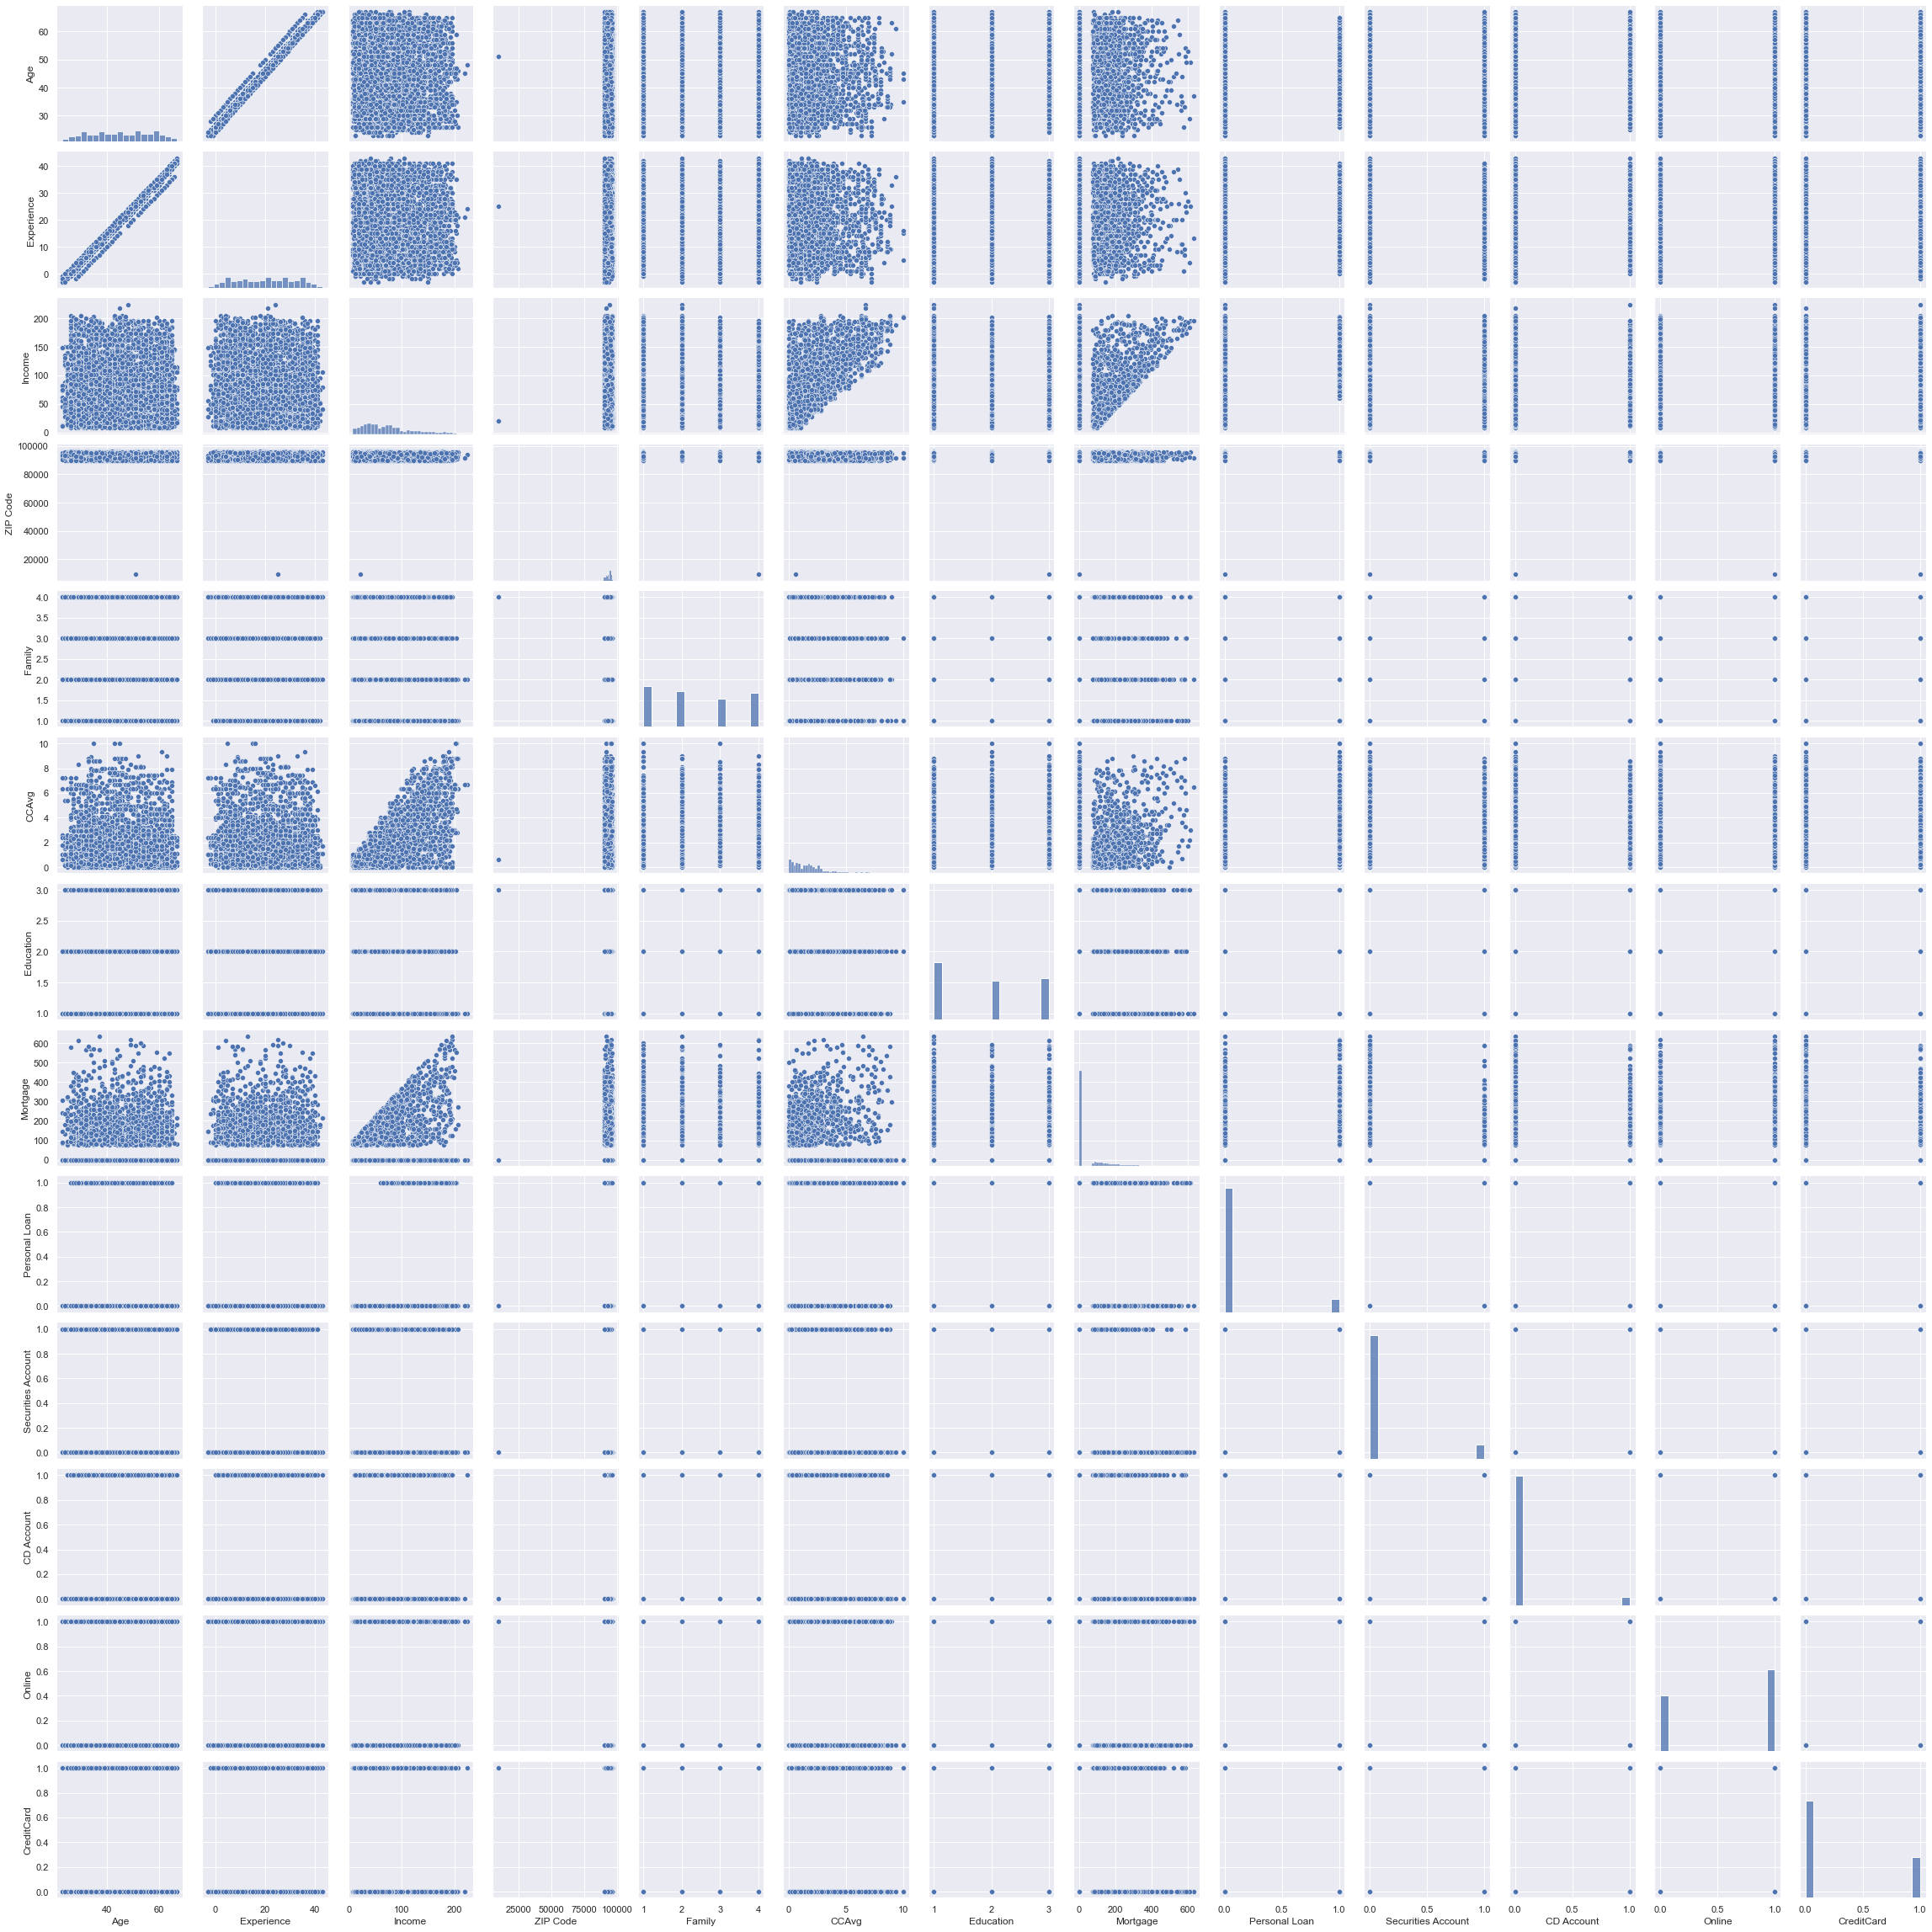

In [11]:
#Bivariate
plt = sns.pairplot(loan[['Age','Experience','Income','ZIP Code','Family','CCAvg' ,'Education' , 'Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']] )
loan.head(1)

<AxesSubplot:>

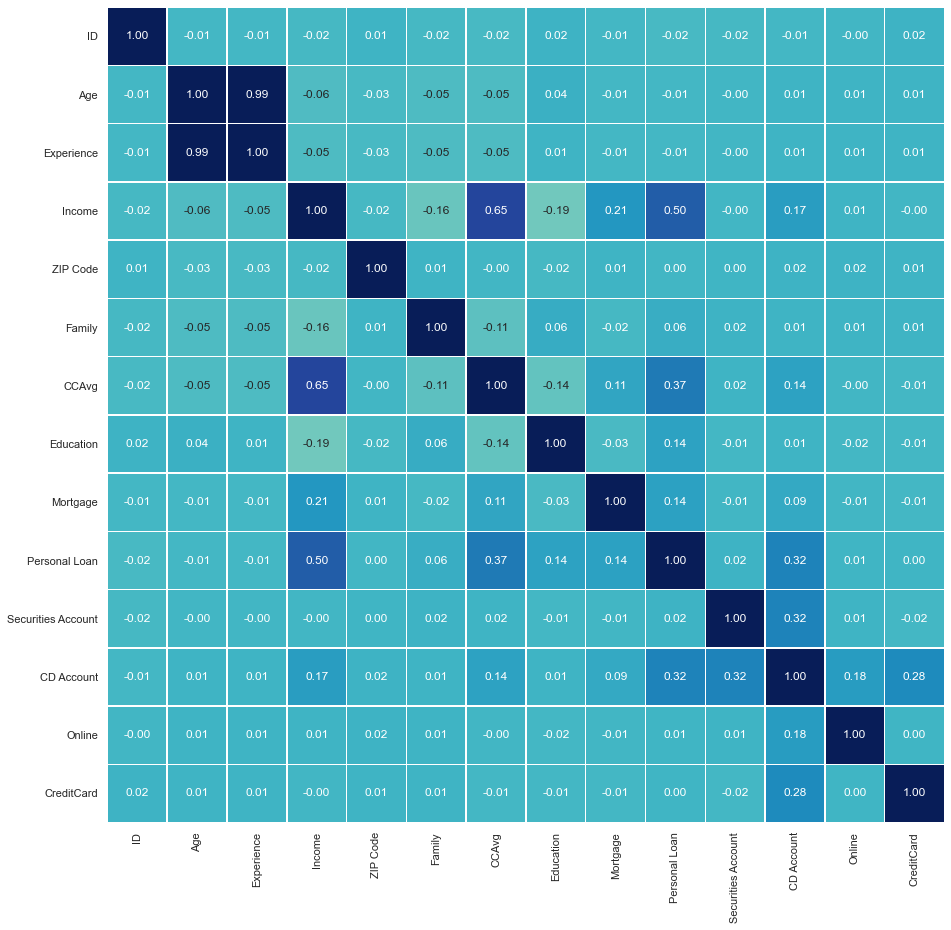

In [14]:
sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(
    loan.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)

<AxesSubplot:xlabel='Education', ylabel='Income'>

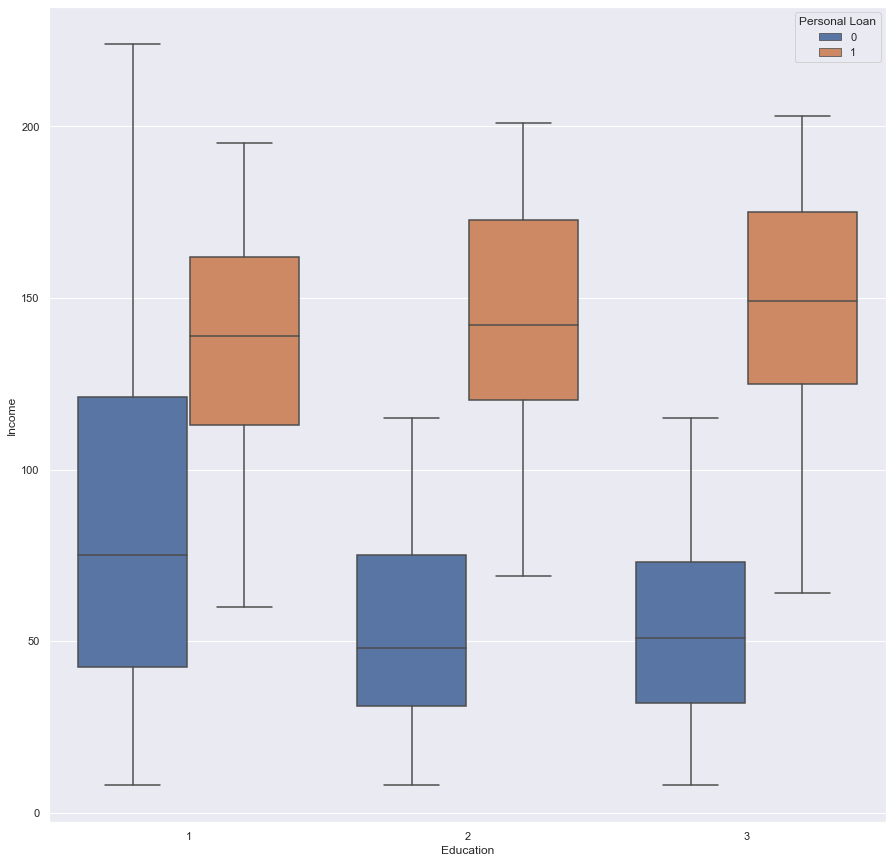

In [15]:
sns.boxplot(x="Education", y="Income", hue="Personal Loan", data=loan)

<AxesSubplot:xlabel='Education', ylabel='Mortgage'>

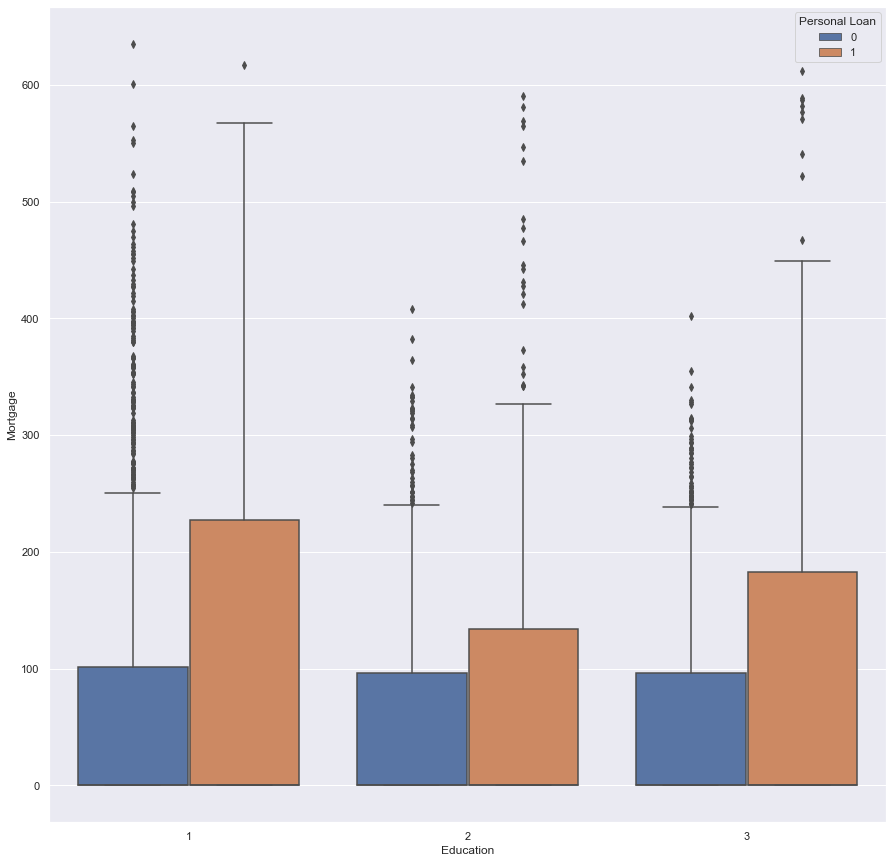

In [16]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=loan)

<AxesSubplot:xlabel='ZIP Code', ylabel='count'>

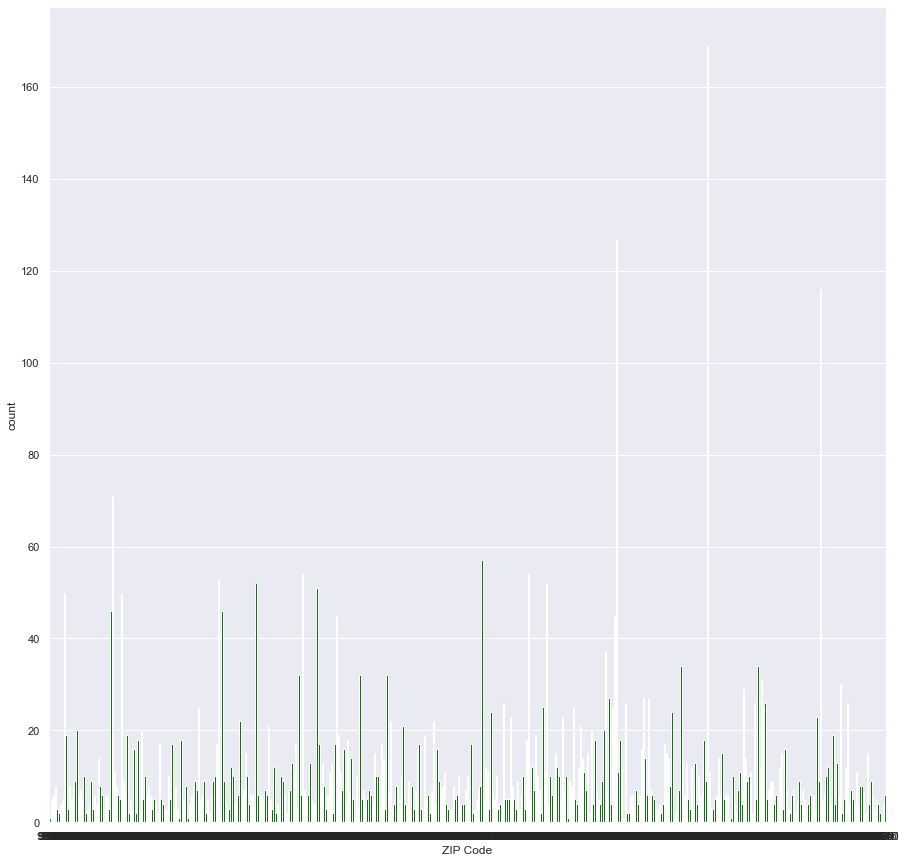

In [17]:
sns.countplot(loan['ZIP Code'], color = 'green')

<AxesSubplot:xlabel='Family', ylabel='count'>

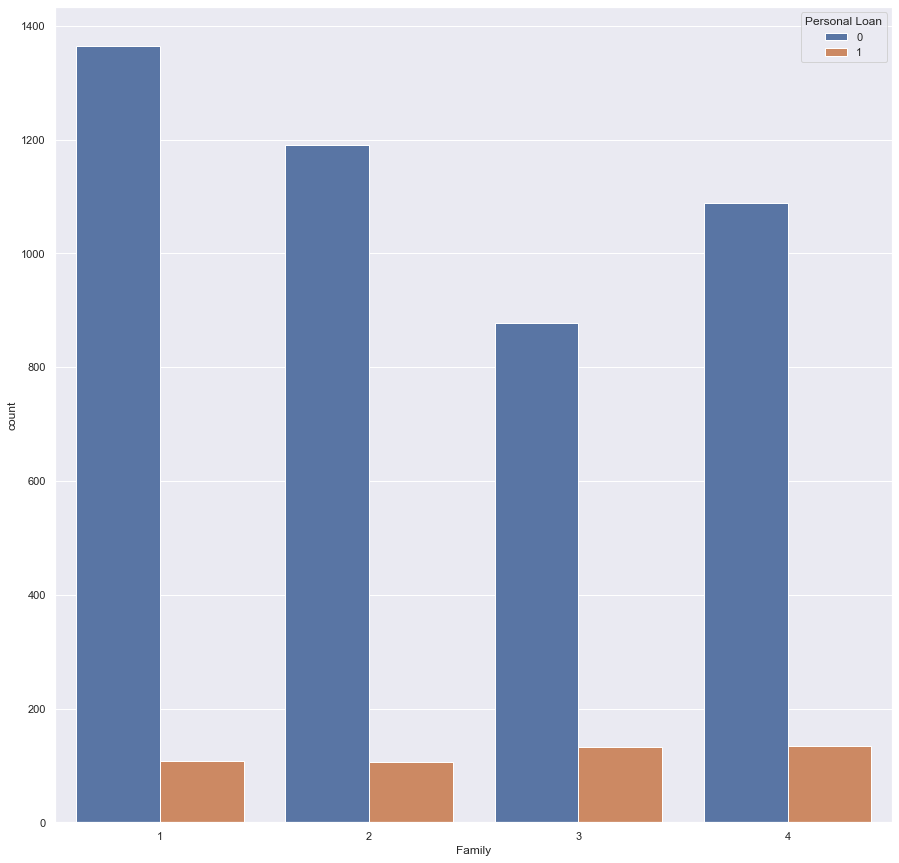

In [18]:
sns.countplot(x="Family", data=loan,hue="Personal Loan")

<AxesSubplot:xlabel='Securities Account', ylabel='count'>

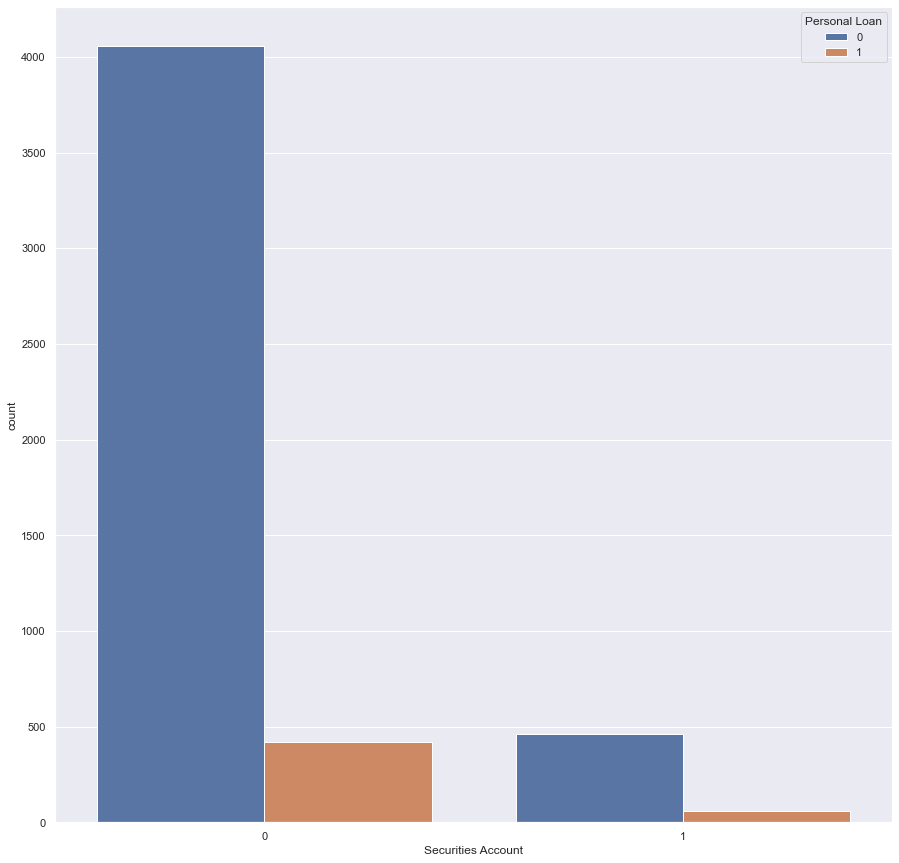

In [19]:
sns.countplot(x="Securities Account", data=loan,hue="Personal Loan")

<AxesSubplot:xlabel='CD Account', ylabel='count'>

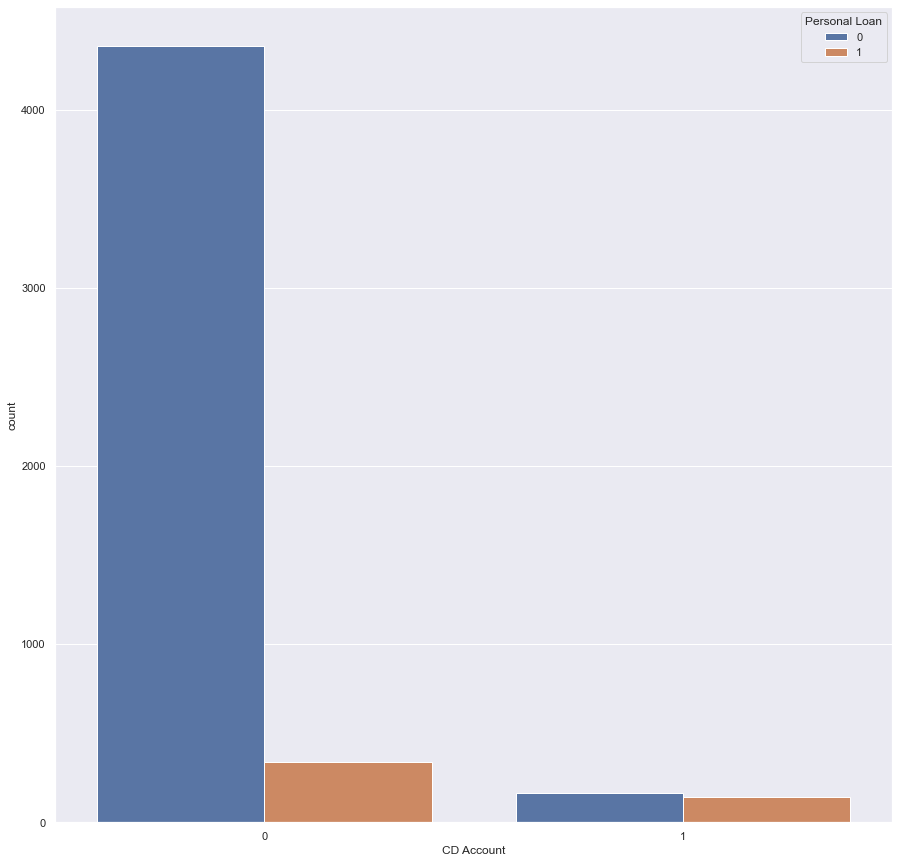

In [20]:
sns.countplot(x="CD Account", data=loan,hue="Personal Loan")

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

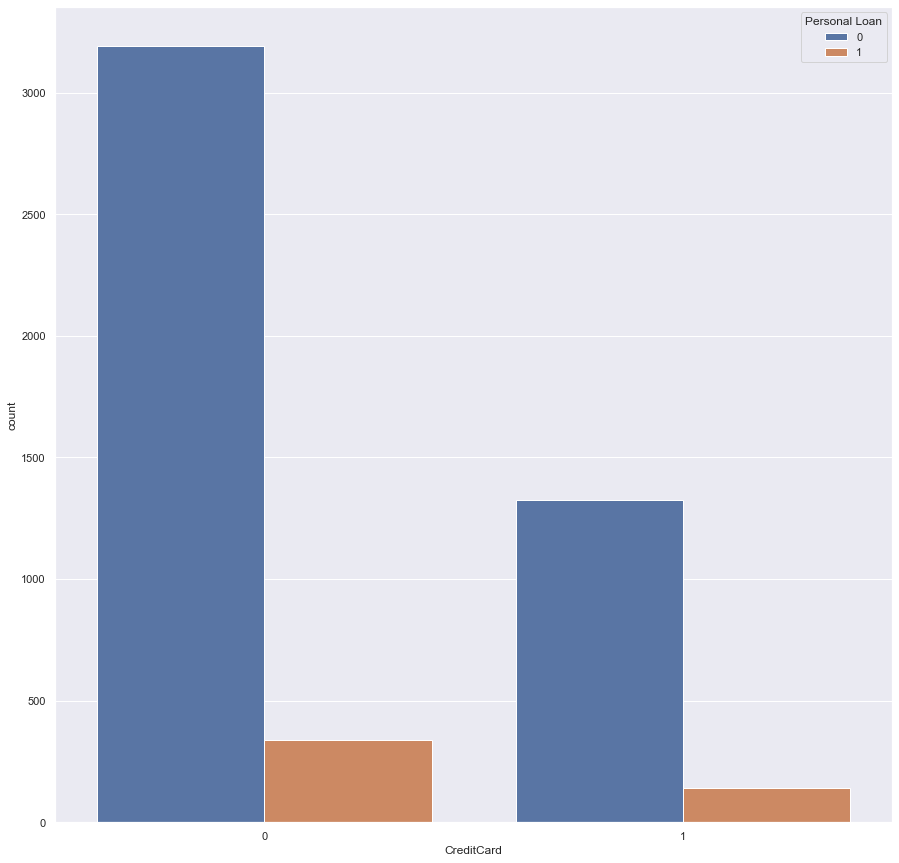

In [21]:
sns.countplot(x="CreditCard", data=loan,hue="Personal Loan")

In [22]:
loan_final = loan.drop('ID',axis =1)
loan_final = loan_final.drop('Experience',axis =1)
loan_final = loan_final.drop('CCAvg',axis =1)

In [23]:
#Get data model ready
## Define X and Y variables

X=loan_final.drop ('Personal Loan', axis=1)
Y=loan_final['Personal Loan']

**Insights:**



### 5. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [24]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

**Insights:**


### 6. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

In [25]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=4294967295,fit_intercept=False)
logreg.fit(X_train, y_train)                    # fit the model on train data

LogisticRegression(fit_intercept=False, random_state=4294967295)

In [26]:
y_predict = logreg.predict(X_test)              # Predicting the target variable on test data

In [27]:
# Observe the predicted and observed classes in a dataframe.

z = X_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z.head()

,Age,Income,ZIP Code,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Observed Loan Status,Predicted Loan Status
3406,42,34,92177,3,3,0,0,0,0,1,0,0
757,52,81,91745,3,2,0,1,0,0,0,0,0
3624,58,70,92028,1,3,0,0,0,0,0,0,0
4544,28,80,95819,3,1,0,0,0,1,0,0,0
3235,60,39,91711,2,3,0,0,0,1,0,0,0


In [52]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1] ))
print()
#print('Confusion Matrix')
#print(draw_cm(y_test,y_predict))


Trainig accuracy 0.9042857142857142

Testing accuracy 0.9153333333333333

Recall: 0.2826086956521739

Precision: 0.582089552238806

F1 Score: 0.38048780487804873

Roc Auc Score: 0.9357668816105897



In [54]:
# !pip install yellowbrick

# Additional

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

AttributeError: 'PairGrid' object has no attribute 'plot'

**Insights:**

### 7. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

In [55]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
1,Income,0.03
0,Age,0.00
2,ZIP Code,0.00
3,Family,0.00
4,Education,0.00
5,Mortgage,0.00
6,Securities Account,0.00
7,CD Account,0.00
8,Online,0.00
9,CreditCard,0.00


**Insights:**

### 8. Give conclusion related to the Business understanding of your model? (5 marks)

**Conclusion:**

Customers with undergraduate level of education and family greater than 3 are good customers who took loan. Customer who took loan have same income range irrespective of education level. Education of Graduate and above have more chance to take loan.

Customers who has securies account are more likly to take loan. Majority of customers who does not have loan do not have securities account.

Family size does not have any impact in personal loan. But it seems families with size of 3 and 4 are more likely to take loan.

Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

Customers who have credit card and monthly spending is higher are more likly to take loan.

Customers who have taken personal loan have higher credit card average than those who did not take loan. So high credit card average seems to be good predictor of whether or not a customer will take a personal loan.

Customers who have taken personal loan have income than those who did not take. So high income seems to be good predictor of whether or not a customer will take a personal loan.

Age and Experience are highly correlated and the correlation is almost 1.

'Income' and 'CCAvg' are moderately correlated.

Personal Loan has maximum correlation with 'Income', 'CCAvg', 'CD Account', 'Mortgage', and 'Education'.

We can see in above heat map there is association of 'CD Account' with 'Credit Card', 'Securities Account', 'Online', 
'CCAvg' and 'Income'.

'Mortgage' has moderate correlation with 'Income' which is about 12%.

'Income' influences 'CCAvg', 'Personal Loan', 'CD Account' and 'Mortgage'.

Trainig accuracy 0.9048571428571428

Testing accuracy 0.918

Recall: 0.30434782608695654

Precision: 0.6086956521739131

F1 Score: 0.4057971014492754

Roc Auc Score: 0.9355327842686586